<a href="https://colab.research.google.com/github/Fuenfgeld/DMA2024TeamC/blob/main/Code/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kursarbeit Datenmanagement und -Archivierung WS 23/24**

Master-Code Name-CALICO:MA


**Explorative Datenanalyse**

> Laden Libraries

In [1]:
import pandas as pd
import sqlite3
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive



> Verbindung zur Datenbank



In [3]:
#connect to DB
conn = sqlite3.connect('/content/drive/My Drive/Datenmanagement_und_Archivierung_im_Umfeld_der_Forschung/CALICO_MA/datawarehouse.db')
cursor = conn.cursor()
print("Datenbank wurde erfolgreich geöffnet")

Datenbank wurde erfolgreich geöffnet


In [4]:
print(pd.read_sql_query('''
SELECT name FROM sqlite_master
WHERE type='table'
ORDER BY name;
     ''', conn))

              name
0       encounters
1      facts_table
2    immunizations
3      medications
4     observations
5         patients
6       procedures
7  sqlite_sequence



> Laden die Daten aus der Datenbank in die DataFrames für die weitere Analyse



In [5]:
df_encounters = pd.read_sql_query("SELECT * FROM encounters", conn)
df_facts_table = pd.read_sql_query("SELECT * FROM facts_table", conn)
df_immunizations = pd.read_sql_query("SELECT * FROM immunizations", conn)
df_medications = pd.read_sql_query("SELECT * FROM medications", conn)
df_observations = pd.read_sql_query("SELECT * FROM observations", conn)
df_patients = pd.read_sql_query("SELECT * FROM patients", conn)
df_procedures = pd.read_sql_query("SELECT * FROM procedures", conn)

Table_Names
patients_bc    1019
patients_cc    1035
patients_lc    1030
Name: Id, dtype: int64


<Axes: xlabel='Table_Names'>

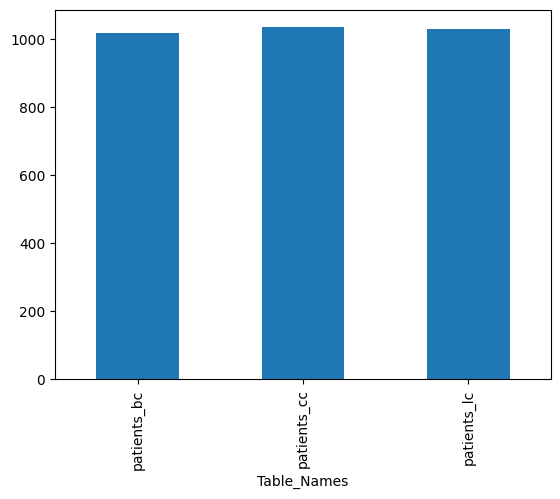

In [6]:
df2 = df_patients.groupby(['Table_Names'])['Id'].count()
print(df2)
df2.plot.bar()

Grafiken

*  Kosten fur jeder krebsarten (Insgesamt)
*  Kosten fur jeder krebsarten (getrennt)
*  Life quality (QALY) mit kosten korrelieren (Insgesamt) (pending if we will assume 4 more yearly observations and add 4 to last value in the data of 2020, death date not available)
*  Life quality (QALY) mit kosten korrelieren (getrennt)
*  Verhaltnis QALY - aktuelle alter (von BIRTHDATE (patients))
*  Statistiche auswertung








